In [38]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as AS
from sklearn.metrics import classification_report as CR
from sklearn.metrics import confusion_matrix as CM
from os import path

## Step 1: Data Preprocessing

In [23]:
df = pd.read_csv('Phishing-Websites-Detection-master\Phishing.csv')
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


#### ***Null Value Checker***

In [24]:
print(df.info())
print("\n")
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

having_IP_Address              False
URL_Length                     False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
Page_Rank                      False
G

#### *Hence there are no Null Values in the dataset*


#### ***Checking for Dependent and Independent Variables***

In [25]:
X = df.copy()

y = X.pop('Result')

X = df.drop(columns=['Result'])

y

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int64

#### *Here the Last Column named as Result in Dataset is the **dependent variable** which is dependent of 30 no of Factors*
#### *Other than Result column are **independent variable*** 

### ***Splitting the dataset into Train and Test sets***

In [26]:
X_train,X_test,y_train,y_test = tts(X,y,stratify=y,test_size=0.25)
input_shape = [X_train.shape[1]]
print("Input shape is ", input_shape)
X.head()

Input shape is  [30]


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


### ***Logistic Regression***

In [27]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR()
lr.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pr = lr.predict(X_test)

In [55]:
logr = CR(y_test,y_pr)
print(logr)
cm = CM(y_test,y_pr)
# CP(y_test,y_pr)
FPR = (cm[0][1]/(cm[0][0] + cm[0][1]))*100
FFR = (cm[1][0]/(cm[1][0]+cm[1][1]))*100
print(FPR,FFR)

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91      1225
           1       0.92      0.94      0.93      1539

    accuracy                           0.92      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.92      0.92      0.92      2764

9.63265306122449 5.977907732293697


### ***K- Nearest Neighbour Algorithm using Euclidean Distance***

In [30]:
from sklearn.neighbors import KNeighborsClassifier as KNC
kn1 = KNC(n_neighbors=3,metric='minkowski',p=2)
kn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pr1 = kn1.predict(X_test)
kn1_eu = CR(y_test,y_pr1)
print(kn1_eu)
cm = CM(y_test,y_pr1)
# CP(y_test,y_pr)
FPR = (cm[0][1]/(cm[0][0] + cm[0][1]))*100
FFR = (cm[1][0]/(cm[1][0]+cm[1][1]))*100
print(FPR,FFR)
AS(y_test,y_pr1)

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94      1225
           1       0.95      0.96      0.95      1539

    accuracy                           0.95      2764
   macro avg       0.95      0.95      0.95      2764
weighted avg       0.95      0.95      0.95      2764

6.693877551020408 4.223521767381416


0.9468162083936325

### ***K-Nearest Neighbour Algorithm using Manhattan Distance***

In [59]:
kn2 = KNC(n_neighbors=5,metric='minkowski',p=1)
kn2.fit(X_train,y_train)
y_pr2 = kn2.predict(X_test)
kn2_eu = CR(y_test,y_pr1)
print(kn2_eu)
cm = CM(y_test,y_pr2)
# CP(y_test,y_pr)
FPR = (cm[0][1]/(cm[0][0] + cm[0][1]))*100
FFR = (cm[1][0]/(cm[1][0]+cm[1][1]))*100
print(FPR,FFR)
AS(y_test,y_pr2)

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94      1225
           1       0.95      0.96      0.95      1539

    accuracy                           0.95      2764
   macro avg       0.95      0.95      0.95      2764
weighted avg       0.95      0.95      0.95      2764

6.36734693877551 3.248862897985705


0.9536903039073806

### ***Support Vector Machine using RBF Kernel***

In [60]:
from sklearn.svm import SVC
sm1 = SVC(kernel='rbf')
sm1.fit(X_train,y_train)
y_pr3 = sm1.predict(X_test)
sm1_rbf = CR(y_test,y_pr3)
print(sm1_rbf)
cm = CM(y_test,y_pr3)
# CP(y_test,y_pr)
FPR = (cm[0][1]/(cm[0][0] + cm[0][1]))*100
FFR = (cm[1][0]/(cm[1][0]+cm[1][1]))*100
print(FPR,FFR)
AS(y_test,y_pr3)

              precision    recall  f1-score   support

          -1       0.95      0.92      0.94      1225
           1       0.94      0.96      0.95      1539

    accuracy                           0.94      2764
   macro avg       0.94      0.94      0.94      2764
weighted avg       0.94      0.94      0.94      2764

8.244897959183675 3.5737491877842755


0.9435600578871202

### ***Support Vector Machine using Sigmoid Kernel***

In [62]:
from sklearn.svm import SVC
sm2 = SVC(kernel='sigmoid')
sm2.fit(X_train,y_train)
y_pr4 = sm2.predict(X_test)
sm2_sig = CR(y_test,y_pr4)
print(sm2_sig)
cm = CM(y_test,y_pr4)
# CP(y_test,y_pr)
FPR = (cm[0][1]/(cm[0][0] + cm[0][1]))*100
FFR = (cm[1][0]/(cm[1][0]+cm[1][1]))*100
print(FPR,FFR)
AS(y_test,y_pr4)

              precision    recall  f1-score   support

          -1       0.82      0.79      0.81      1225
           1       0.84      0.87      0.85      1539

    accuracy                           0.83      2764
   macro avg       0.83      0.83      0.83      2764
weighted avg       0.83      0.83      0.83      2764

21.224489795918366 13.32033788174139


0.8317655571635311

### ***Decision Tree Classifier***

In [63]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC()
dtc.fit(X_train,y_train)
y_pr5 = dtc.predict(X_test)
dec_tr = CR(y_test,y_pr5)
print(dec_tr)
cm = CM(y_test,y_pr5)
# CP(y_test,y_pr)
FPR = (cm[0][1]/(cm[0][0] + cm[0][1]))*100
FFR = (cm[1][0]/(cm[1][0]+cm[1][1]))*100
print(FPR,FFR)
AS(y_test,y_pr5)

              precision    recall  f1-score   support

          -1       0.96      0.95      0.95      1225
           1       0.96      0.96      0.96      1539

    accuracy                           0.96      2764
   macro avg       0.96      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764

5.3061224489795915 3.508771929824561


0.9569464544138929

### ***Random Forest Classifier***

In [65]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(n_estimators=10,random_state=0,n_jobs=1)
rfc.fit(X_train,y_train)
y_pr6 = rfc.predict(X_test)
ran_for = CR(y_test,y_pr6)
cm = CM(y_test,y_pr6)
# CP(y_test,y_pr)
FPR = (cm[0][1]/(cm[0][0] + cm[0][1]))*100
FFR = (cm[1][0]/(cm[1][0]+cm[1][1]))*100
print(FPR,FFR)
AS(y_test,y_pr6)

4.326530612244897 1.8843404808317088


0.9703328509406657

### ***Naïve Bayes Algorithm***

In [66]:
from sklearn.naive_bayes import BernoulliNB as BN
bn = BN()
bn.fit(X_train,y_train)
y_pr7 = bn.predict(X_test)
ber_nb = CR(y_test,y_pr7)
print(ber_nb)
cm = CM(y_test,y_pr7)
# CP(y_test,y_pr)
FPR = (cm[0][1]/(cm[0][0] + cm[0][1]))*100
FFR = (cm[1][0]/(cm[1][0]+cm[1][1]))*100
print(FPR,FFR)
AS(y_test,y_pr7)

              precision    recall  f1-score   support

          -1       0.89      0.90      0.90      1225
           1       0.92      0.91      0.92      1539

    accuracy                           0.91      2764
   macro avg       0.90      0.91      0.91      2764
weighted avg       0.91      0.91      0.91      2764

9.551020408163264 9.161793372319687


0.9066570188133141

### ***Neural Network***

In [67]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import keras

In [74]:
df['Result'] = df['Result'].map({-1:0, 1:1})
df['Result'].unique()


array([0, 1], dtype=int64)

In [76]:
X = df.copy()

y = X.pop('Result')

X = df.drop(columns=['Result'])

y
X_train,X_test,y_train,y_test = tts(X,y,stratify=y,test_size=0.25)
input_shape = [X_train.shape[1]]
print("Input shape is ", input_shape)
X.head()

Input shape is  [30]


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [77]:
model = Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    Dense(1, activation='sigmoid'),
])

In [78]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()],
    
)

In [79]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.01,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=100,
    callbacks=[early_stopping],
)

Epoch 1/100
130/130 [==============================] - 6s 24ms/step - loss: 0.2296 - accuracy: 0.9094 - precision_3: 0.9184 - recall_3: 0.9190 - val_loss: 0.2217 - val_accuracy: 0.9367 - val_precision_3: 0.9118 - val_recall_3: 0.9812
Epoch 2/100
130/130 [==============================] - 2s 16ms/step - loss: 0.1680 - accuracy: 0.9303 - precision_3: 0.9342 - recall_3: 0.9411 - val_loss: 0.1398 - val_accuracy: 0.9501 - val_precision_3: 0.9359 - val_recall_3: 0.9773
Epoch 3/100
130/130 [==============================] - 2s 16ms/step - loss: 0.1513 - accuracy: 0.9374 - precision_3: 0.9371 - recall_3: 0.9515 - val_loss: 0.1245 - val_accuracy: 0.9504 - val_precision_3: 0.9618 - val_recall_3: 0.9487
Epoch 4/100
130/130 [==============================] - 2s 16ms/step - loss: 0.1282 - accuracy: 0.9467 - precision_3: 0.9498 - recall_3: 0.9547 - val_loss: 0.1010 - val_accuracy: 0.9580 - val_precision_3: 0.9576 - val_recall_3: 0.9675
Epoch 5/100
130/130 [==============================] - 2s 16ms/s

KeyError: "None of [Index(['binary_accuracy', 'val_binary_accuracy'], dtype='object')] are in the [columns]"

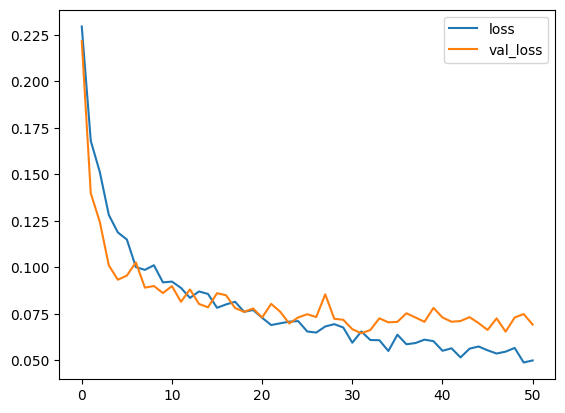

In [80]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()
print(history_df)
print(f"Best Validation Loss: {history_df['val_loss'].min()}" +\
      f"\nBest Validation Accuracy: {history_df['val_binary_accuracy'].max()}"+\
      f"\nBest Recall: {history_df['val_recall'].max()}" +\
      f"\nBest Precision: {history_df['val_precision'].max()}"
)

In [81]:
predictions = model.predict(X_test)
predictions

87/87 [==============================] - 1s 3ms/step


array([[9.9999803e-01],
       [1.0937914e-01],
       [3.0320922e-07],
       ...,
       [9.9998569e-01],
       [1.0000000e+00],
       [9.9792695e-01]], dtype=float32)

In [82]:
predictions = (predictions > 0.5)*1

In [89]:
cm = CM(y_test,predictions)
print(cm)
FPR = (cm[0][1]/(cm[0][0] + cm[0][1]))*100
FFR = (cm[1][0]/(cm[1][0]+cm[1][1]))*100
print(FPR,FFR)
AS(y_test,predictions)

[[1190   35]
 [  36 1503]]
2.857142857142857 2.3391812865497075


0.9743125904486252

### ***Genetic Algorithm***